# How to use R packages such as ggplot in Julia
[From here](https://avt.im/blog/2018/03/23/R-packages-ggplot-in-julia)

In [2]:
import Pkg; Pkg.add("RCall")

   Updating registry at `/opt/julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed WinReg ─────────────────────── v0.3.1
  Installed Reexport ───────────────────── v1.0.0
  Installed Crayons ────────────────────── v4.0.4
  Installed Missings ───────────────────── v0.4.5
  Installed DataAPI ────────────────────── v1.6.0
  Installed CategoricalArrays ──────────── v0.9.6
  Installed RCall ──────────────────────── v0.13.11
  Installed ChainRulesCore ─────────────── v0.9.38
  Installed TableTraits ────────────────── v1.0.1
  Installed OpenSpecFun_jll ────────────── v0.5.3+4
  Installed InvertedIndices ────────────── v1.0.0
  Installed DataValueInterfaces ────────── v1.0.0
  Installed IteratorInterfaceExtensions ── v1.0.0
  Installed Formatting ─────────────────── v0.4.2
  Installed StatsModels ────────────────── v0.6.22
  Installed Rmath ──────────────────────── v0.6.1
  Installed CompilerSuppo

In [3]:
using RCall

┌ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1278


In [4]:
@rlibrary ggplot2

In [5]:
qplot(1:10,[i^2 for i in 1:10])

LoadError: REvalError: Error: `expr` must quote a symbol, scalar, or call
Backtrace:
    █
 1. └─(function (x, y, ..., data, facets = NULL, margins = FALSE, geom = "auto", ...
 2.   └─rlang::quo_name(exprs$x)
 3.     └─rlang::expr_name(quo_squash(quo))

In [8]:
import Pkg; Pkg.add("DataFrames")

  Resolving package versions...
Updating `/opt/julia/environments/v1.5/Project.toml`
  [a93c6f00] + DataFrames v1.0.0
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


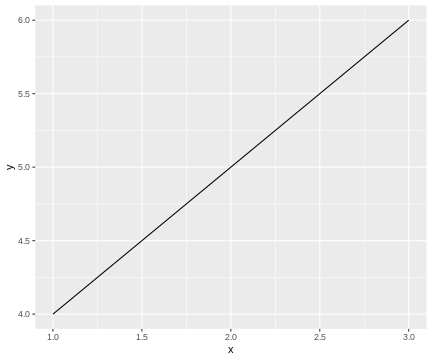

RObject{VecSxp}


In [23]:
using DataFrames
d = DataFrame(v = [3,4,5], w = [5,6,7], x = [1,2,3], y = [4,5,6], z = [1,1,2])

ggplot(d, aes(x=:x,y=:y)) + geom_line()


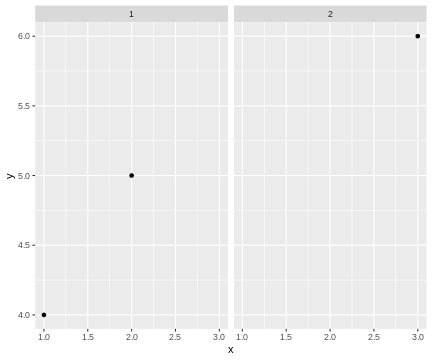

RObject{VecSxp}


In [25]:
ggplot(d, aes(x=:x,y=:y)) + geom_point() + facet_wrap(R"~z")

In [22]:
# d = d |>
#   x -> R"$x[,1] = as.numeric($d[,1]); $x" |>
#   x -> R"$x[,2] = as.numeric($d[,2]); $x" |>
#   x -> R"$x[,3] = as.numeric($d[,3]); $x" |>
#   x -> R"$x[,4] = as.factor(as.numeric($x[,4])); $x" |>
#   x -> R"$x[,5] = as.factor(as.character($x[,5])); $x" |>
#   x -> names!(d, [:u_min, :u_max, :x, :u, :solution])

LoadError: [91mUndefVarError: names! not defined[39m

In [17]:
d

RObject{VecSxp}
  v w x y z
1 3 5 1 1 1
2 4 6 2 2 1
3 5 7 3 3 2


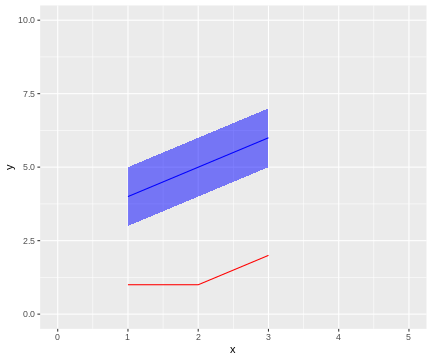

RObject{VecSxp}


In [24]:
ggplot(d, aes(x=:x)) +
  geom_ribbon(aes(ymin=:v, ymax=:w), fill="blue", alpha=0.5) +
  geom_line(aes(y=:y), color="blue") +
  lims(x=[0,5], y=[0,10]) +
  geom_line(aes(y=:z), color="red")